In [ ]:
import IPython.display as ipd
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.utils import class_weight
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
IM_SIZE = (224, 224, 3)

DATA_PATH = '/content/drive/MyDrive/10SecSplitMajor'
BIRDS = os.listdir(DATA_PATH)
BATCH_SIZE = 16

In [ ]:
# ad = '/content/splitted10Audio/Grey-sided Thrush/XC80632 -original.mp3'
# audio = AudioSegment.from_wav(ad)
# audio

# Audio Analysis


In [ ]:
!pip install pydub
from pydub import AudioSegment
import os

os.chdir('/content')
DATA_PATH = '/content/drive/MyDrive/MajorProjectDataset'
BIRDS = os.listdir(DATA_PATH)

amp_max = {}
for bird in BIRDS:
    amp_max[bird] = []
    for audio_file in os.listdir(os.path.join(DATA_PATH, bird)):
        os.chdir(os.path.join(DATA_PATH, bird))
        try:
            audio = AudioSegment.from_mp3(audio_file)
        except:
            print("File handled: ", audio_file)
            audio = AudioSegment.from_wav(audio_file)
        amp_max[bird].append(audio.max)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
File handled:  XC653450 - Grey-sided Thrush - Turdus feae.mp3


In [ ]:
avg_max_amp.values()

dict_values([21483.28, 40082797.83, 15990.42, 14645.81, 17922.54, 15148.85, 19901.08, 17473.81, 22984.25, 20106.11, 23945.11, 17683.66, 27777.6, 15352.24, 12834.85, 18495.08, 28636.33, 20482.61, 17166.33, 19326.04, 15143.88, 18048.77, 10191.45, 20603.6, 17198.86, 15684.1, 3616.62, 24901.29, 17728.58, 22673.0, 20218.17, 27050.73, 11877.12, 16665.55, 10653.38, 22603.88, 15486.0, 21310.05, 19264.92, 18225.45, 26150.2])

In [ ]:
import pandas as pd
import numpy as np

avg_max_amp = {}
for k in amp_max.keys():
    avg_max_amp[k] = round(np.array(amp_max[k]).mean(), 2)
amp_df = pd.DataFrame(data= {'Birds': avg_max_amp.keys(), 'Avg. Max. Amplitude': avg_max_amp.values()})
# amp_df
amp_df.sort_values('Avg. Max. Amplitude', ascending=False, inplace=True)

In [ ]:
amp_df.reset_index(inplace=True)

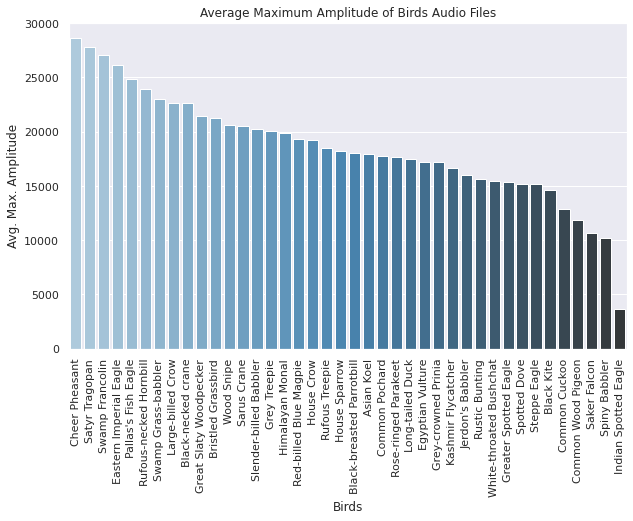

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

plt.figure(figsize=(10, 6))
plt.title("Average Maximum Amplitude of Birds Audio Files")
plt.xlabel("Birds")
plt.ylabel("Average Maximum Amplitude (in Hz)")
plt.xticks(rotation=90)
sns.barplot(y= "Avg. Max. Amplitude", x = "Birds", data = amp_df.iloc[1:, 1:], palette=("Blues_d"))

In [ ]:
import numpy as np
np.array(amp_max['Great Slaty Woodpecker']).mean()

21882.58695652174

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 22})
sns.set()

bird_count = {}
DATA_PATH = '/content/drive/MyDrive/10SecSplitMajor'
BIRDS = os.listdir(DATA_PATH)

for bird in BIRDS:
    bird_count[bird] = len(os.listdir(os.path.join(DATA_PATH, bird)))

In [ ]:
birds_to_augment = [k for k, v in bird_count.items() if v<30]
birds_to_augment


['Saker Falcon',
 'Swamp Francolin',
 'Eastern Imperial Eagle',
 'Kashmir Flycatcher',
 'White-throated Bushchat',
 'Black-breasted Parrotbill',
 'Indian Spotted Eagle',
 'Steppe Eagle',
 'Egyptian Vulture',
 "Pallas's Fish Eagle",
 'Cheer Pheasant',
 'Grey-crowned Prinia',
 'Swamp Grass-babbler']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text major ticklabel objects>)

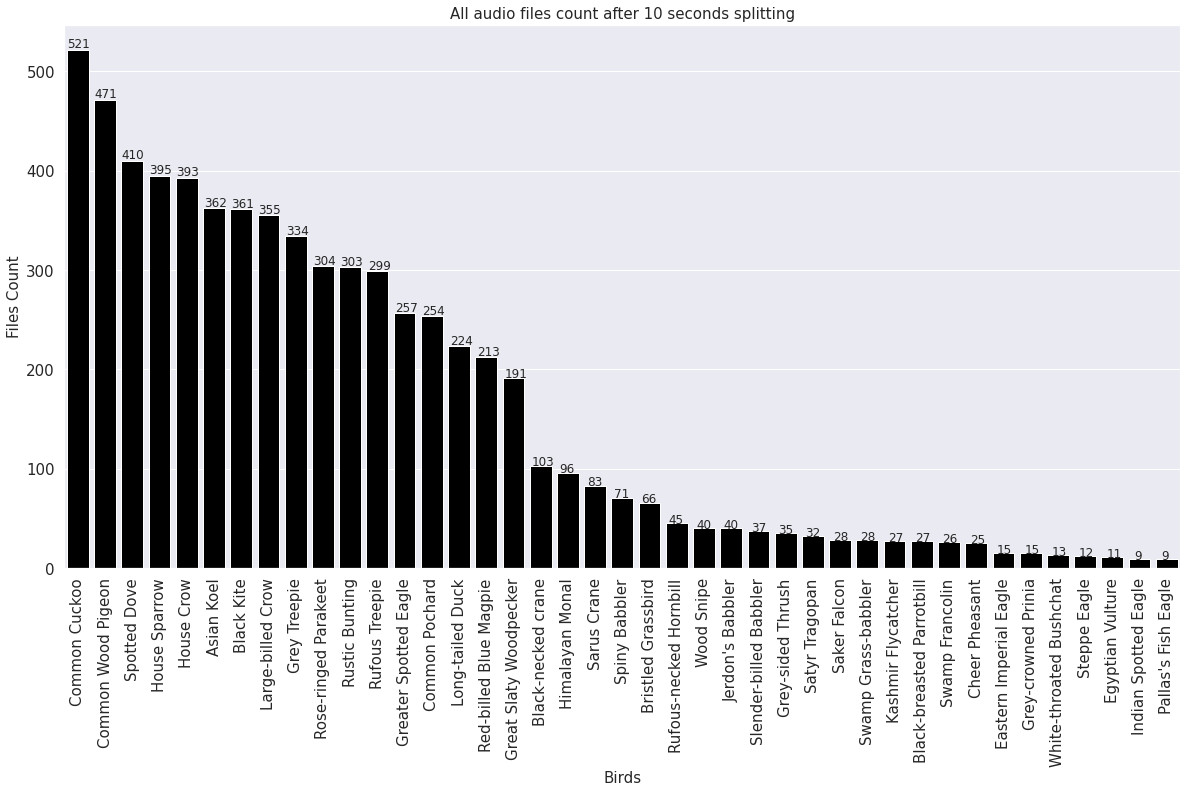

In [ ]:
k = sorted(bird_count.items(), key=lambda x:x[1], reverse=True)
x = [i[0] for i in k]
y = [i[1] for i in k]

plt.figure(figsize=(20, 10))
ax = sns.barplot(x, y, color='black')
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('All audio files count after 10 seconds splitting', fontsize=15)
plt.xlabel('Birds', fontsize=15)
plt.ylabel('Files Count', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text major ticklabel objects>)

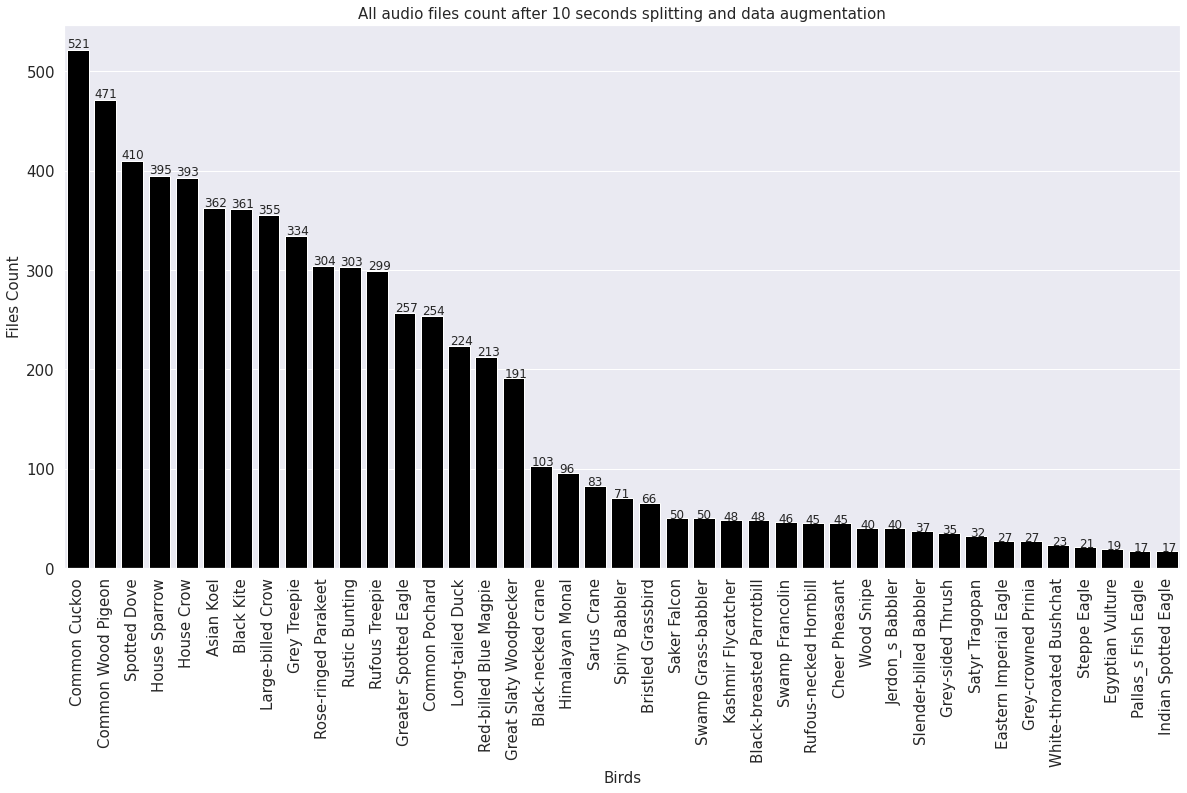

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 22})
sns.set()

bird_count_train = {}
bird_count_val = {}
bird_count_test = {}

def bird_counter(tvt):
    bird_count_dict = {}
    DATA_PATH = f'/content/drive/MyDrive/ScalogramMidFinal/{tvt}'
    BIRDS = os.listdir(DATA_PATH)

    for bird in BIRDS:
        bird_count_dict[bird] = len(os.listdir(os.path.join(DATA_PATH, bird)))

    return bird_count_dict

bird_count_train = bird_counter('train')
bird_count_val = bird_counter('val')
bird_count_test = bird_counter('test')
bird_count = {}
for keys, values in bird_count_train.items():
    bird_count[keys] = bird_count_train[keys] + bird_count_val[keys] + bird_count_test[keys]

k = sorted(bird_count.items(), key=lambda x:x[1], reverse=True)
x = [i[0] for i in k]
y = [i[1] for i in k]

plt.figure(figsize=(20, 10))
ax = sns.barplot(x, y, color='black')
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('All audio files count after 10 seconds splitting and data augmentation', fontsize=15)
plt.xlabel('Birds', fontsize=15)
plt.ylabel('Files Count', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xticks(rotation=90)

# Train, Validation, Testing split

In [ ]:
!pip install split-folders
import splitfolders
splitfolders.ratio('/content/drive/MyDrive/10SecSplitMajor', output="/content/DataSplitted", seed=77, ratio=(.8, 0.1,0.1)) 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 6540 files [11:41,  9.33 files/s]


# Data Augmentation for data less than 30

In [ ]:
# !pip install audiomentations

import librosa
import soundfile as sf
import numpy as np
import os
from audiomentations import Compose, AddGaussianNoise
from audiomentations import Compose, AddGaussianNoise

train_path = '/content/DataSplitted/train'

augment_raw_audio = Compose(
    [
        AddGaussianNoise(min_amplitude=0.01, max_amplitude=0.015, p=1)
    ]
)

for bird in birds_to_augment:
    os.chdir(os.path.join(train_path, bird))
    for filename in os.listdir(os.path.join(train_path, bird)):
        x, sr = librosa.load(filename)
        augmented_signal = augment_raw_audio(x, sr)
        sf.write(f'{filename}aug.wav', augmented_signal, sr, format='wav')
os.chdir('/content')

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/cor

In [ ]:
count = 0
for bird in os.listdir('/content/DataSplitted/train'):
    count = count + len(os.listdir(os.path.join('/content/DataSplitted/train', bird)))
count

5407

In [ ]:
count = 0
for bird in os.listdir('/content/DataSplitted/test'):
    count = count + len(os.listdir(os.path.join('/content/DataSplitted/test', bird)))
count

687

In [ ]:
count = 0
for bird in os.listdir('/content/DataSplitted/val'):
    count = count + len(os.listdir(os.path.join('/content/DataSplitted/val', bird)))
count

637

In [ ]:
# # import shutil

# # output_filename = 'DataAugmented'
# source = '/content/DataSplitted'
# # shutil.make_archive(output_filename, 'zip', source)

# destination = '/content/drive/MyDrive/MajorDataAugmented'
# shutil.copytree(source, destination)

'/content/drive/MyDrive/MajorDataAugmented'

# Audio splitting

In [ ]:
# !pip install pydub

from pydub import AudioSegment
import math

validAudio = lambda audio, amp_threshold: True if audio.max > amp_threshold else False
def splitAudio(audio_file, export_category, sec_to_split=10):

    global temp_n
    temp_n = 0
    mili=1000
    export_folder = f'/content/splitted10Audio/{export_category}/'
    export_name = audio_file[:9]
    exportFormat = 'mp3'
    try:
        audio = AudioSegment.from_mp3(audio_file)
    except:
        print("File handled: ", audio_file)
        audio = AudioSegment.from_wav(audio_file)
    th = audio.max//2
 
    duration = math.floor(audio.duration_seconds)
    splits = np.arange(0, duration, sec_to_split)

    if duration > sec_to_split:
        rem = duration % sec_to_split
        n_splits = round(duration / sec_to_split)
        for n in range(n_splits-1): # Except last splitted file
            newAudio = audio[splits[n]*mili:splits[n+1]*mili]
            temp_n = n
            if validAudio(newAudio, th):
                newAudio.export(f'{export_folder}/{export_name}{n}.{exportFormat}', format=exportFormat)
        
        # For the last splitted file
        if rem <= sec_to_split//2:
            n = temp_n
            # If remaining  audio is small enough, don't separate
            newAudio = audio[splits[n+1]*mili:duration*mili]
            if validAudio(newAudio, th):
                newAudio.export(f'{export_folder}/{export_name}{n+1}.{exportFormat}', format=exportFormat)

        else:
            n = temp_n
            # If remaining audio is big enough, make it separate file
            newAudio = audio[splits[n+1]*mili:duration*mili]
            if validAudio(newAudio, th):
                newAudio.export(f'{export_folder}/{export_name}{n+1}.{exportFormat}', format=exportFormat)

    else:
        if validAudio(audio, th):
            audio.export(f'{export_folder}/{export_name}original.{exportFormat}', format=exportFormat)

                        # extraAudio = audio[splits[n+2]*mili:duration]
            # if validAudio(extraAudio, th):
            #     extraAudio.export(f'{export_folder}/{export_name}Extra.{exportFormat}', format=exportFormat)

In [ ]:
import shutil
shutil.rmtree('/content/splitted10Audio')

In [ ]:
os.chdir('/content')
export_folder = '/content/splitted10Audio/'
os.mkdir(export_folder)

DATA_PATH = '/content/drive/MyDrive/MajorProjectDataset'
BIRDS = os.listdir(DATA_PATH)

for bird in BIRDS:
    os.mkdir(os.path.join(export_folder, bird))
    for audio_file in os.listdir(os.path.join(DATA_PATH, bird)):
        os.chdir(os.path.join(DATA_PATH, bird))
        splitAudio(audio_file, export_category=bird)

File handled:  XC653450 - Grey-sided Thrush - Turdus feae.mp3


In [ ]:
import shutil

os.chdir('/content')
output_filename= 'splitted'
dir_name = '/content/splitted10Audio'
shutil.make_archive(output_filename, 'zip', dir_name)
# shutil.copyfile(source, destination)

'/content/splitted.zip'

In [ ]:
src = '/content/splitted10Audio'
dest = '/content/drive/MyDrive/splitted_major100'
# shutil.copytree(src, dest)
source = '/content/splitted.zip'
destination = dest
shutil.copyfile(source, destination)

'/content/drive/MyDrive/splitted_major100'

In [ ]:
dir = '/content/splitted10Audio'
sum = 0
for bird in os.listdir(dir):
    sum += len(os.listdir(os.path.join(dir, bird)))
sum

6540

In [ ]:
from collections import OrderedDict
splitted_count = {}
for bird in os.listdir(export_folder):
    splitted_count[bird] = len(os.listdir(os.path.join(export_folder, bird)))
OrderedDict(sorted(splitted_count.items(), key = lambda x: x[1], reverse=True))


OrderedDict([('Common Cuckoo', 521),
             ('Common Wood Pigeon', 471),
             ('Spotted Dove', 410),
             ('House Sparrow', 395),
             ('House Crow', 393),
             ('Asian Koel', 362),
             ('Black Kite', 361),
             ('Large-billed Crow', 355),
             ('Grey Treepie', 334),
             ('Rose-ringed Parakeet', 304),
             ('Rustic Bunting', 303),
             ('Rufous Treepie', 299),
             ('Greater Spotted Eagle', 257),
             ('Common Pochard', 254),
             ('Long-tailed Duck', 224),
             ('Red-billed Blue Magpie', 213),
             ('Great Slaty Woodpecker', 191),
             ('Black-necked crane', 103),
             ('Himalayan Monal', 96),
             ('Sarus Crane', 83),
             ('Spiny Babbler', 71),
             ('Bristled Grassbird', 66),
             ('Rufous-necked Hornbill', 45),
             ("Jerdon's Babbler", 40),
             ('Wood Snipe', 40),
             ('Slender-bil

In [ ]:
from collections import OrderedDict
birds_count = {}
for bird in BIRDS:
    birds_count[bird] = len(os.listdir(os.path.join(DATA_PATH, bird)))
k = OrderedDict(sorted(birds_count.items(), key = lambda x: x[1], reverse=True))

filterBirds = []
for keys, values in k.items():
    if values>=20:
        filterBirds.append(keys)
filterBirds

['House Crow',
 'Asian Koel',
 'Common Cuckoo',
 'Black Kite',
 'Spotted Dove',
 'Common Wood Pigeon',
 'Rose-ringed Parakeet',
 'House Sparrow',
 'Large-billed Crow',
 'Rufous Treepie',
 'Grey Treepie',
 'Long-tailed Duck',
 'Common Pochard',
 'Rustic Bunting',
 'Red-billed Blue Magpie',
 'Great Slaty Woodpecker',
 'Greater Spotted Eagle',
 'Himalayan Monal',
 'Sarus Crane',
 'Black-necked crane',
 'Bristled Grassbird']

In [ ]:
# import shutil

# shutil.rmtree('/content/DataSpectrogram')

6540

# MFCCs Spectrogram Creation

In [ ]:
import shutil
shutil.rmtree('/content/DataSpectrogram')

In [ ]:
import warnings
import os

warnings.filterwarnings("ignore")

DATA_PATH = '/content/drive/MyDrive/10SecSplitMajor'
BIRDS = os.listdir(DATA_PATH)

os.chdir('/content')
os.mkdir('DataSpectrogram')
os.chdir('/content/DataSpectrogram')
count = 0

for bird in BIRDS:
    os.mkdir(bird)
    os.chdir(f'/content/DataSpectrogram/{bird}')
    # Load the mp3 file
    audio_files = os.listdir(os.path.join(DATA_PATH, bird))
    for audio_data in audio_files:
        signal, sr = librosa.load(os.path.join(DATA_PATH, bird, audio_data),duration=10) # sr = sampling rate
        # Plot mel-spectrogram
        N_FFT = 1024         
        HOP_SIZE = 1024       
        N_MELS = 128            
        WIN_SIZE = 1024      
        WINDOW_TYPE = 'hann' 
        FEATURE = 'mel'      
        FMIN = 1400 

        S = librosa.feature.melspectrogram(y=signal,sr=sr,
                                            n_fft=N_FFT,
                                            hop_length=HOP_SIZE, 
                                            n_mels=N_MELS, 
                                            htk=True, 
                                            fmin=FMIN, 
                                            fmax=sr/2) 

        plt.figure(figsize=(10, 4))
        librosa.display.specshow(librosa.power_to_db(S**2,ref=np.max), fmin=FMIN,y_axis='linear')
        # plt.colorbar(format='%+2.0f dB')
        plt.axis(False)
        plt.tight_layout()
        # plt.show()
        count += 1
        plt.savefig(f'{bird}{count}.jpg')
        
    os.chdir(f'/content/DataSpectrogram/')

In [ ]:
import shutil
import os

os.chdir('/content')
output_filename= 'spectrograms'
dir_name = '/content/DataSpectrogram'
shutil.make_archive(output_filename, 'zip', dir_name)

In [ ]:
source = '/content/DataSpectrogram'
destination = '/content/drive/MyDrive/Spectrograms10Folder'
shutil.copytree(source, destination)

'/content/drive/MyDrive/Spectrograms10'

# Wavelet Transform Scalogram

In [ ]:
import os
import numpy as np
import shutil
if 'DataScalogram' in os.listdir('/content'):
    shutil.rmtree('/content/DataScalogram')

In [ ]:
# exclude1 = os.listdir('/content/drive/MyDrive/ScalogramAug18/train')
# exclude2 = os.listdir('/content/drive/MyDrive/ScalogramAug18_2nd_lot/train')
# exclude = exclude1 + exclude2
# exclude

In [ ]:
# INCLUDE_BIRDS = [bird for bird in BIRDS if bird not in exclude]
# INCLUDE_BIRDS

test: Pallas_s Fish Eagle Started!!
test: Pallas_s Fish Eagle Done!!
test: Eastern Imperial Eagle Started!!
test: Eastern Imperial Eagle Done!!
test: House Sparrow Started!!
test: House Sparrow Done!!
test: Black-necked crane Started!!
test: Black-necked crane Done!!
test: Saker Falcon Started!!
test: Saker Falcon Done!!
test: White-throated Bushchat Started!!
test: White-throated Bushchat Done!!
test: Slender-billed Babbler Started!!
test: Slender-billed Babbler Done!!
test: Kashmir Flycatcher Started!!
test: Kashmir Flycatcher Done!!
test: Bristled Grassbird Started!!
test: Bristled Grassbird Done!!
test: Common Wood Pigeon Started!!
test: Common Wood Pigeon Done!!
test: Swamp Francolin Started!!
test: Swamp Francolin Done!!
test: House Crow Started!!
test: House Crow Done!!
test: Spiny Babbler Started!!
test: Spiny Babbler Done!!
test: Steppe Eagle Started!!
test: Steppe Eagle Done!!
test: Black-breasted Parrotbill Started!!
test: Black-breasted Parrotbill Done!!
test: Egyptian Vult

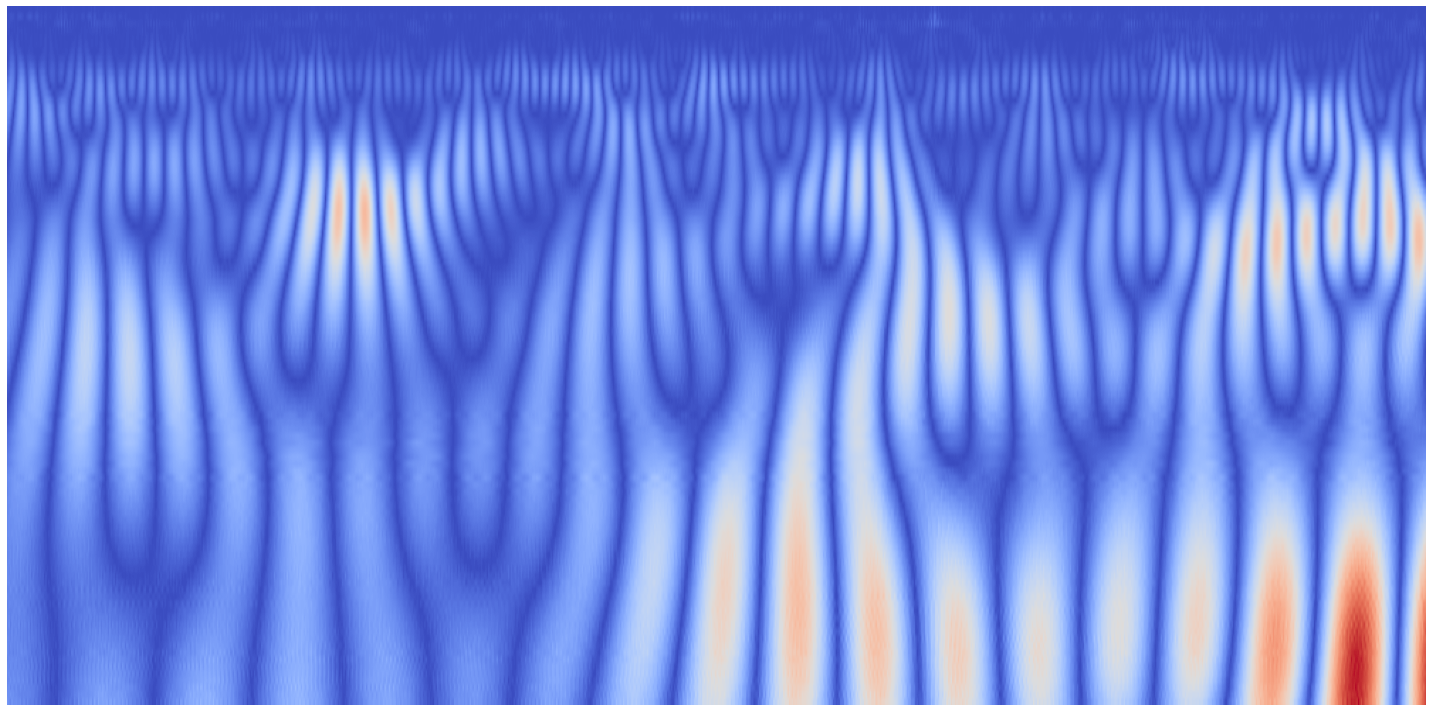

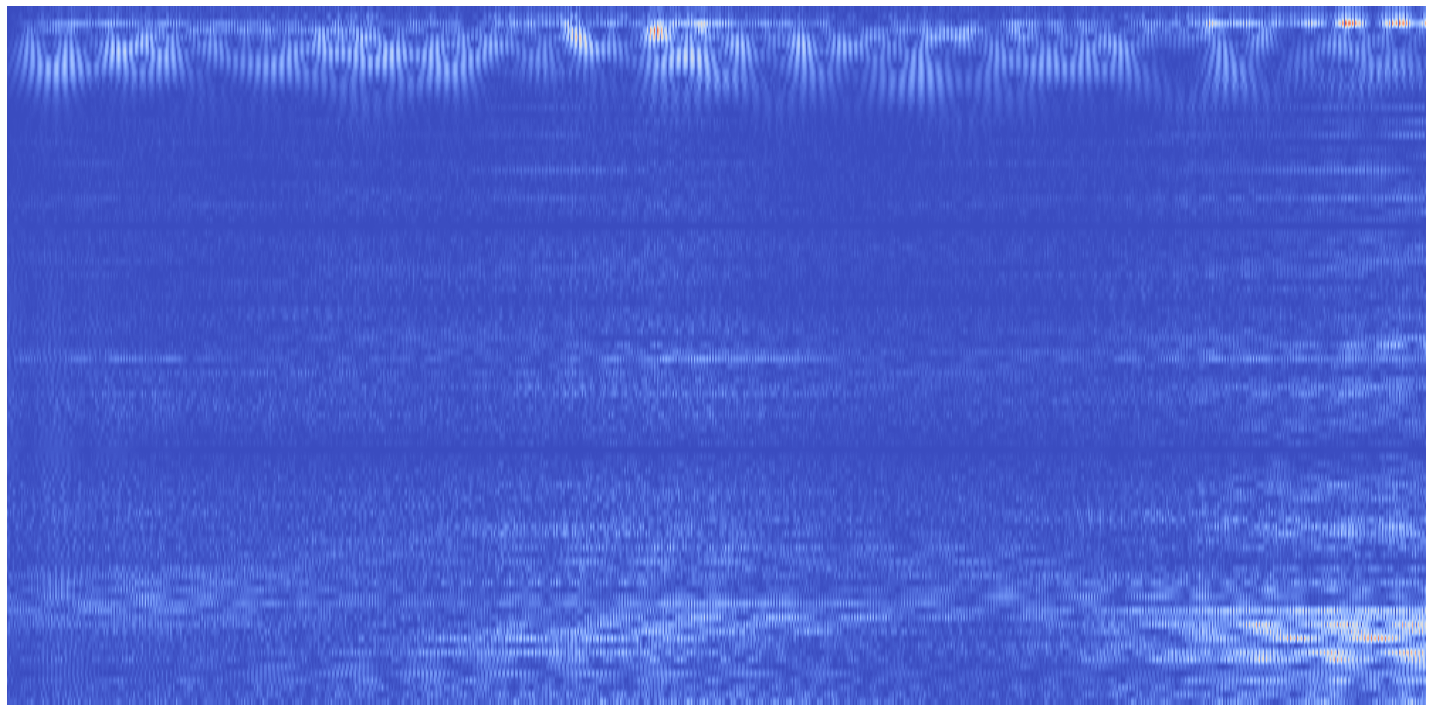

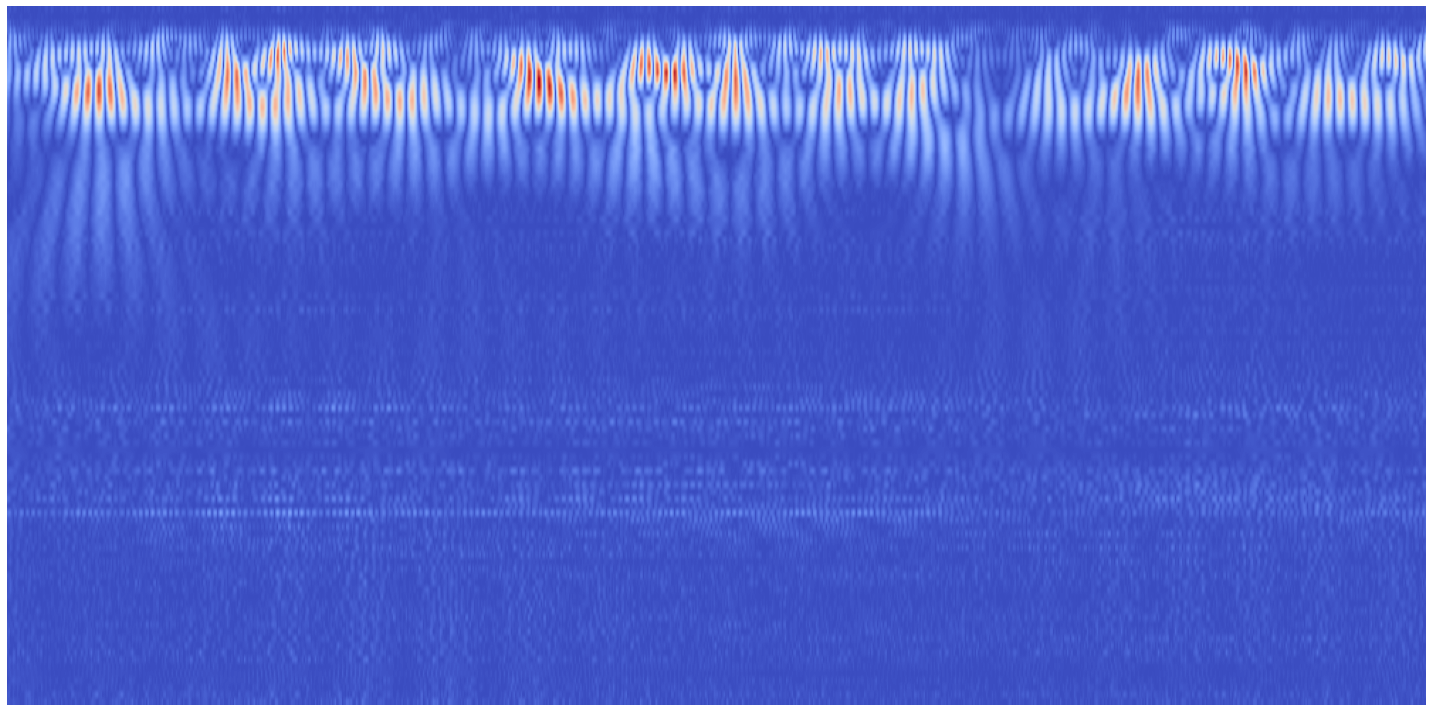

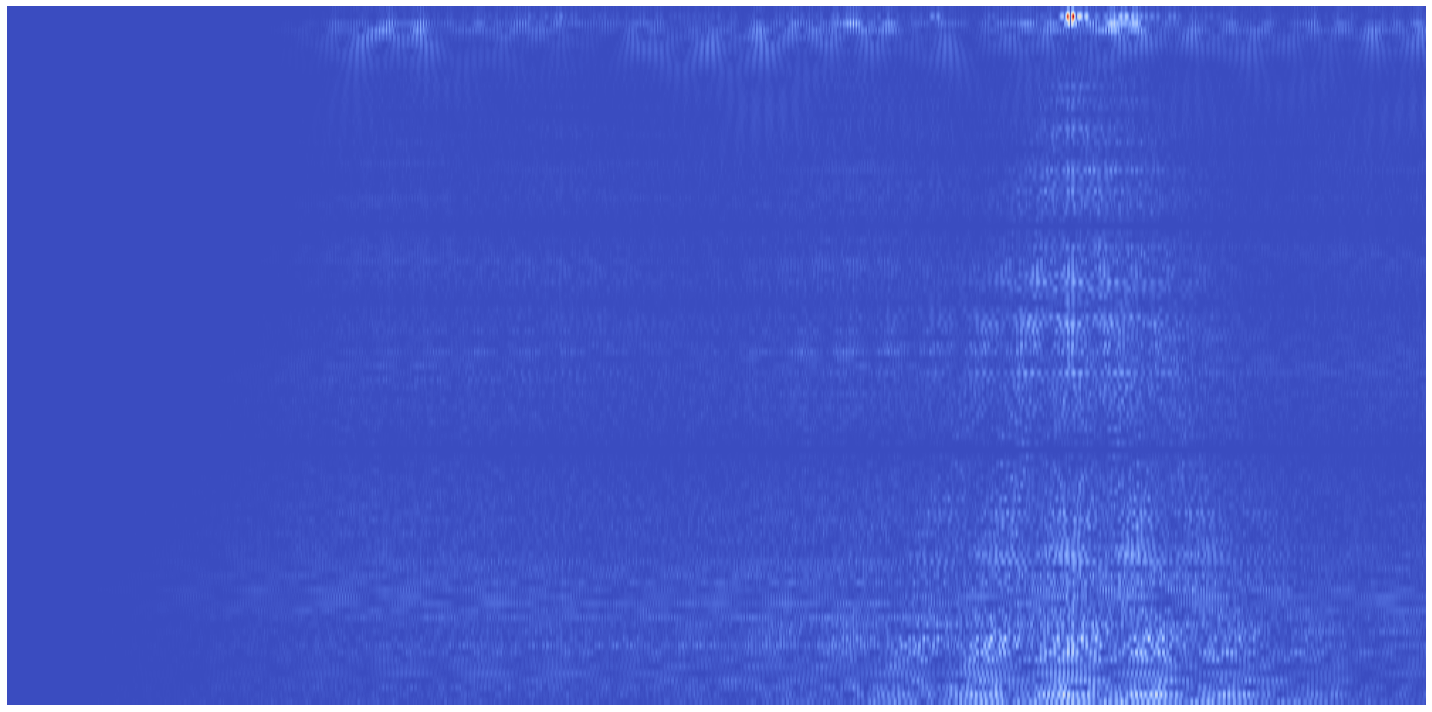

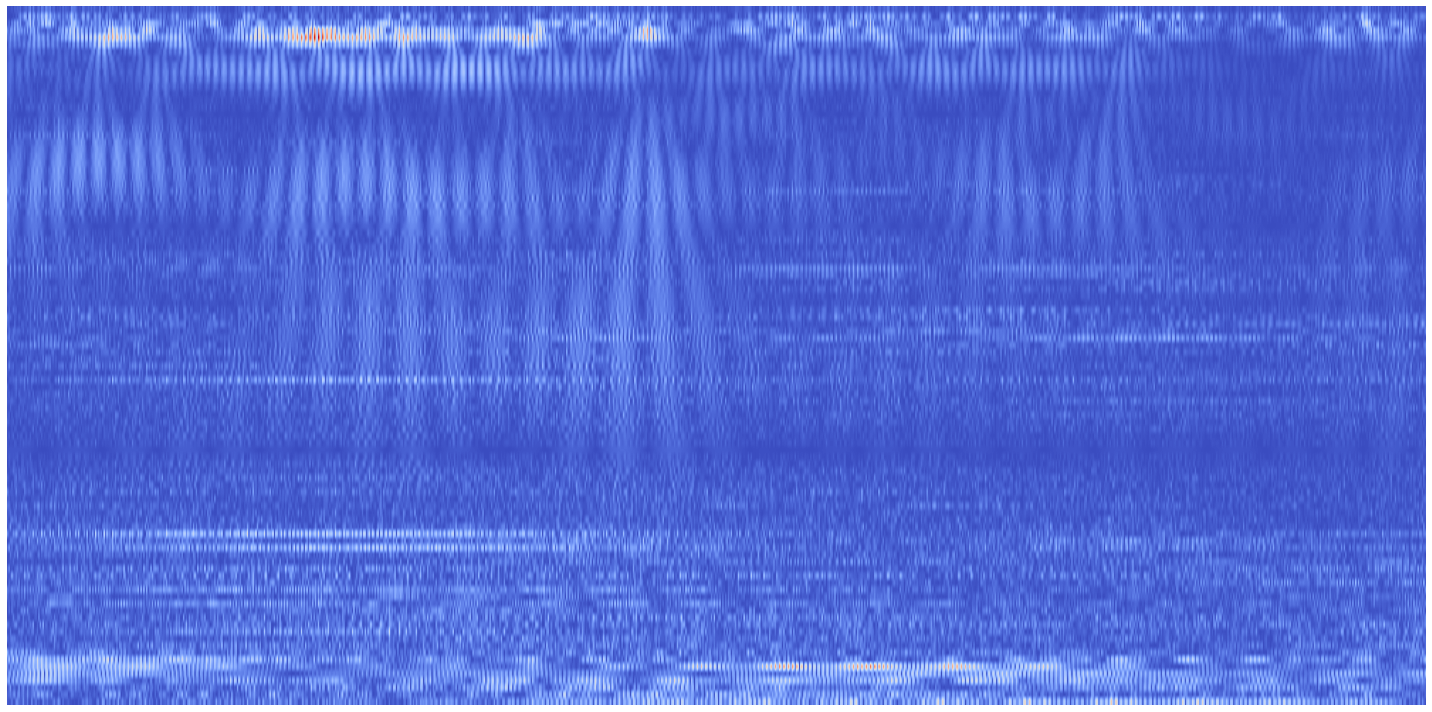

In [ ]:
import warnings
import librosa
import matplotlib.pyplot as plt
import pywt
import numpy as np

warnings.filterwarnings("ignore")

for train_val_test in ['train', 'val', 'test']:
    DATA_PATH = f'/content/drive/MyDrive/DataAugmentedMajor/{train_val_test}'

    BIRDS = os.listdir(DATA_PATH)
    # BIRDS = INCLUDE_BIRDS
    os.chdir('/content')
    os.makedirs(f'DataScalogram/{train_val_test}')
    os.chdir(f'/content/DataScalogram/{train_val_test}')
    sampling_rate = 500
    scale_size = 100 + 1
    wavelet = 'morl'
    scales = np.arange(1, scale_size, 1) 
    coef_range = 1000
    
    for bird in BIRDS:
        count = 0
        os.mkdir(bird)
        os.chdir(f'/content/DataScalogram/{train_val_test}/{bird}')

        # Load the mp3 file
        audio_files = os.listdir(os.path.join(DATA_PATH, bird))
        print(f"{train_val_test}: {bird} Started!!")
        for audio_data in audio_files:
            signal, sr = librosa.load(os.path.join(DATA_PATH, bird, audio_data), sr=sampling_rate) # sr = sampling rate

            coef, freqs = pywt.cwt(signal, scales, wavelet) # Finding CWT with morlet wavelet
            
            plt.figure(figsize=(20, 10))
            plt.imshow(abs(coef[:, :coef_range]), cmap='coolwarm', aspect='auto')
            plt.axis(False)
            plt.tight_layout()
            count += 1
            plt.savefig(f'{bird}{count}.jpg', bbox_inches='tight', pad_inches=0.0)

        print(f"{train_val_test}: {bird} Done!!")
        os.chdir(f'/content/DataScalogram/{train_val_test}')

In [ ]:
import os
import shutil

os.chdir('/content')
output_filename = 'scalogram'
source = '/content/DataScalogram'
# shutil.make_archive(output_filename, 'zip', source)
destination = '/content/drive/MyDrive/ScalogramAug18_test_2nd'
shutil.copytree(source, destination)

'/content/drive/MyDrive/ScalogramAug18_test_2nd'

In [ ]:
# import os

# DATA_PATH = '/content/drive/MyDrive/10SecSplitMajor'
# all_birds = os.listdir(DATA_PATH)
# converted_birds = os.listdir('/content/DataScalogram')
# req_birds = [bird for bird in all_birds if bird not in converted_birds]
# req_birds

['Himalayan Monal',
 'Swamp Grass-babbler',
 'Long-tailed Duck',
 'Grey Treepie',
 'Black Kite',
 'Common Cuckoo',
 'Great Slaty Woodpecker',
 "Jerdon's Babbler"]

# Model Implementation

In [ ]:
import os
import IPython.display as ipd
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.utils import class_weight
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
DATA_PATH = '/content/drive/MyDrive/ScalogramMidFinal'
BIRDS = os.listdir(f'{DATA_PATH}/train')
# BIRDS = filterBirds
BATCH_SIZE = 2
IM_SIZE = (224, 224)

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.1,
    fill_mode="nearest",
)
train_batches = train_datagen.flow_from_directory(
    os.path.join(DATA_PATH, "train"),
    classes=BIRDS,
    target_size=IM_SIZE,
    class_mode="categorical",
    shuffle=True,
    batch_size=BATCH_SIZE,
)

valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
valid_batches = valid_datagen.flow_from_directory(
    os.path.join(DATA_PATH, "val"),
    classes=BIRDS,
    target_size=IM_SIZE,
    class_mode="categorical",
    shuffle=False,
    batch_size=BATCH_SIZE,
)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_batches = test_datagen.flow_from_directory(
    os.path.join(DATA_PATH, "test"),
    classes=BIRDS,
    target_size=IM_SIZE,
    class_mode="categorical",
    shuffle=False,
    batch_size=BATCH_SIZE,
)

Found 5407 images belonging to 41 classes.
Found 639 images belonging to 41 classes.
Found 687 images belonging to 41 classes.


In [ ]:
from tensorflow.keras.applications.efficientnet import EfficientNetB3

# Define CNN's architecture
net = EfficientNetB3(
    include_top=False, weights="imagenet", input_tensor=None, input_shape=(224, 224, 3)
)
x = net.output
x = Flatten()(x)
x = Dropout(0.5)(x)
output_layer = Dense(len(BIRDS), activation="softmax", name="softmax")(x)
net_final = Model(inputs=net.input, outputs=output_layer)
net_final.compile(
    optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"]
)

# print(net_final.summary())

In [ ]:
# Estimate class weights for unbalanced dataset
# class_weights = class_weight.compute_class_weight(
#     "balanced",
#     np.unique(train_batches.classes),
#     train_batches.classes)

# Define callbacks
ModelCheck = ModelCheckpoint(
    "models/efficientnet_checkpoint.h5",
    monitor="val_loss",
    verbose=0,
    save_best_only=True,
    save_weights_only=True,
    mode="auto",
    period=1,
)

ReduceLR = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=3e-4)

In [ ]:
# Train the model
net_final.fit(
    train_batches,
    validation_data=valid_batches,
    epochs=30,
    # steps_per_epoch=1596,
    # class_weight=class_weights,
    # callbacks=[ModelCheck, ReduceLR]
)

Epoch 1/30


UnimplementedError: ignored

# Model Implementation Simple CNN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import IPython.display as ipd
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
# from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.utils import class_weight
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
DATA_PATH = '/content/drive/MyDrive/ScalogramMidFinal'
BIRDS = os.listdir(f'{DATA_PATH}/train')
# BIRDS = filterBirds
BATCH_SIZE = 16
IM_SIZE = (224, 224)

# train_datagen = ImageDataGenerator(
#     preprocessing_function=preprocess_input,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.1,
#     fill_mode="nearest",
# )
# train_batches = train_datagen.flow_from_directory(
#     os.path.join(DATA_PATH, "train"),
#     classes=BIRDS,
#     target_size=IM_SIZE,
#     class_mode="categorical",
#     shuffle=True,
#     batch_size=BATCH_SIZE,
# )

# valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
# valid_batches = valid_datagen.flow_from_directory(
#     os.path.join(DATA_PATH, "val"),
#     classes=BIRDS,
#     target_size=IM_SIZE,
#     class_mode="categorical",
#     shuffle=False,
#     batch_size=BATCH_SIZE,
# )

# test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
# test_batches = test_datagen.flow_from_directory(
#     os.path.join(DATA_PATH, "test"),
#     classes=BIRDS,
#     target_size=IM_SIZE,
#     class_mode="categorical",
#     shuffle=False,
#     batch_size=BATCH_SIZE,
# )

train_ds = keras.utils.image_dataset_from_directory(
  os.path.join(DATA_PATH, "train"),
  seed=77,
  image_size= IM_SIZE,
  batch_size=BATCH_SIZE)

val_ds = keras.utils.image_dataset_from_directory(
  os.path.join(DATA_PATH, "val"),
  seed=77,
  image_size= IM_SIZE,
  batch_size=BATCH_SIZE)

Found 5407 files belonging to 41 classes.
Found 639 files belonging to 41 classes.


In [ ]:
import tensorflow as tf

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found GPU at: /device:GPU:0


In [ ]:
model = Sequential([
                    Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
                    MaxPool2D(pool_size=(2, 2), strides=2),
                    BatchNormalization(axis=-1),

                    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
                    MaxPool2D(pool_size=(2, 2), strides=2),
                    BatchNormalization(axis=-1),

                    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
                    MaxPool2D(pool_size=(2, 2), strides=2),
                    BatchNormalization(axis=-1),
                    Flatten(),
                    Dense(units=len(BIRDS), activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 112, 112, 16)     64        
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                      

In [ ]:
# Model training
model.compile(optimizer=Adam(learning_rate=0.0001), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
model.fit(train_ds, validation_data=val_ds, epochs=15, verbose=1)

Epoch 1/15


UnimplementedError: ignored

# Rough

In [ ]:
import pywt
import librosa
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
filename = os.getcwd() + "/6.mp3"
sampling_rate = 500
x, sr = librosa.load(filename, sr=sampling_rate)

scale_size = 100 + 1
wavelet = 'morl'
scales = np.arange(1, scale_size, 1) 
coef_range = 1000

coef, freqs = pywt.cwt(x, scales, wavelet) # Finding CWT with morlet wavelet

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


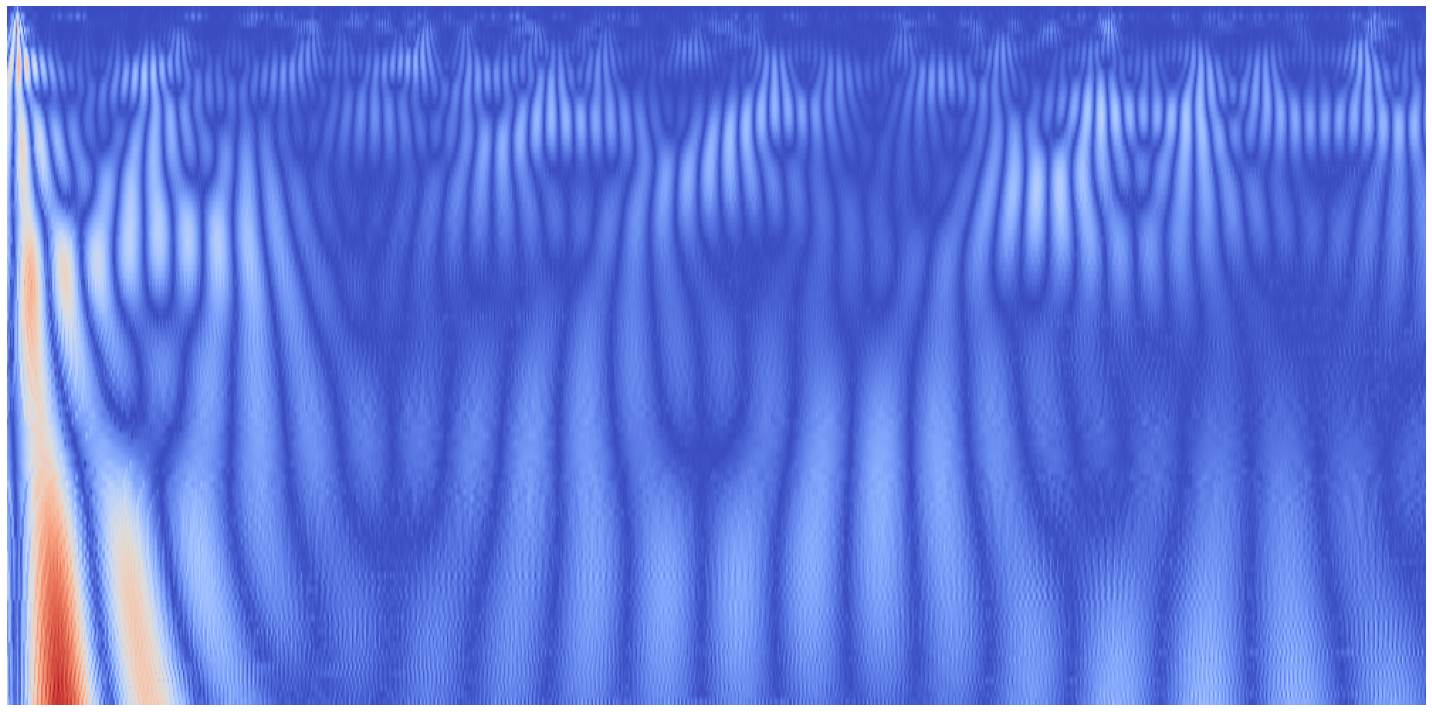

In [ ]:
# Scalogram plot

plt.figure(figsize=(20, 10))
plt.imshow(abs(coef[:, :coef_range]), cmap='coolwarm', aspect='auto')
plt.axis(False)
plt.tight_layout()
plt.savefig(f'converted.jpg', bbox_inches='tight', pad_inches=0.0)
plt.show()

In [ ]:
x.shape

(6000,)

In [ ]:
coef.shape

(100, 220500)

Augmentations

In [ ]:
import pywt
import librosa
import soundfile as sf
import numpy as np
import os
import matplotlib.pyplot as plt

filename = os.getcwd() + "/cheerpheasant.mp3"
x, sr = librosa.load(filename)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [ ]:
# !pip install audiomentations
from audiomentations import Compose, AddGaussianNoise, PitchShift, HighPassFilter, TimeStretch, Shift

augment_raw_audio = Compose(
    [
        # AddGaussianNoise(min_amplitude=0.01, max_amplitude=0.015, p=1),
        TimeStretch(min_rate=0.8, max_rate=1.25, p=1),
        # Shift(min_fraction=-0.5, max_fraction=0.5, p=0.5),
        # PitchShift(min_semitones=-8, max_semitones=8, p=1),
        # HighPassFilter(min_cutoff_freq=2000, max_cutoff_freq=4000, p=1)
    ]
)
augmented_signal = augment_raw_audio(x, sr)
sf.write('augmented.mp3', augmented_signal, sr, format='wav')

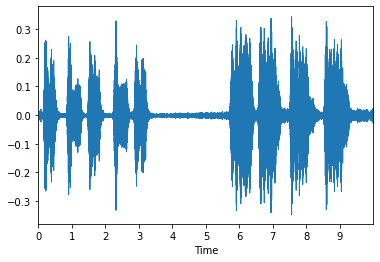

In [ ]:
import IPython.display as ipd
import librosa.display
librosa.display.waveplot(augmented_signal, sr=sr)

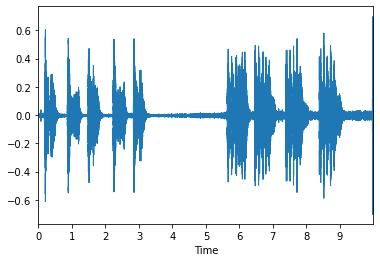

In [ ]:
librosa.display.waveplot(x, sr=sr)

In [ ]:
import IPython
IPython.display.Audio(filename)

In [ ]:
IPython.display.Audio("augmented.mp3")

# Rough 2


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 [==============================] - 11s 0us/step


In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


UnimplementedError: ignored

In [ ]:
import os

count = 0
path = '/content/drive/MyDrive/ScalogramMidFinal/train'
for bird in os.listdir(path):
    count = count + len(os.listdir(os.path.join(f'{path}/{bird}')))
count

5407

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text major ticklabel objects>)

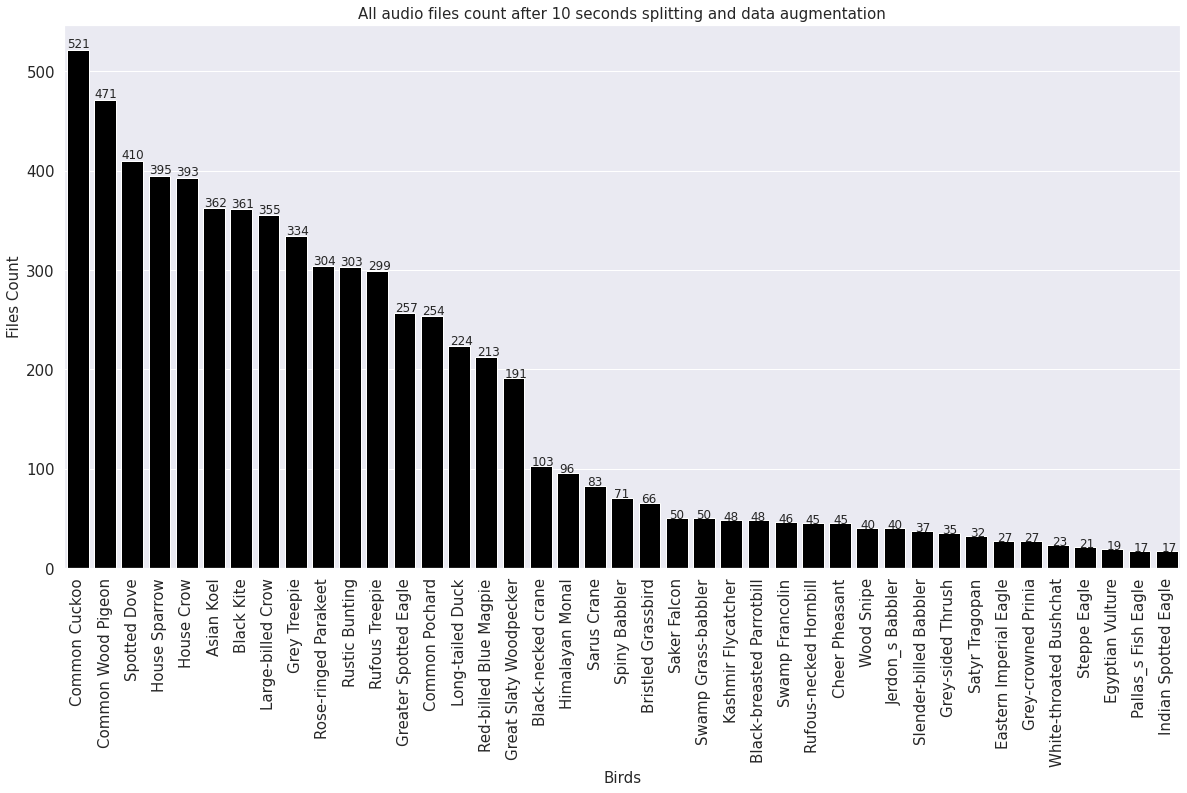

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 22})
sns.set()

bird_count_train = {}
bird_count_val = {}
bird_count_test = {}

def bird_counter(tvt):
    bird_count_dict = {}
    DATA_PATH = f'/content/drive/MyDrive/ScalogramMidFinal/{tvt}'
    BIRDS = os.listdir(DATA_PATH)

    for bird in BIRDS:
        bird_count_dict[bird] = len(os.listdir(os.path.join(DATA_PATH, bird)))

    return bird_count_dict

bird_count_train = bird_counter('train')
bird_count_val = bird_counter('val')
bird_count_test = bird_counter('test')
bird_count = {}
for keys, values in bird_count_train.items():
    bird_count[keys] = bird_count_train[keys] + bird_count_val[keys] + bird_count_test[keys]

k = sorted(bird_count.items(), key=lambda x:x[1], reverse=True)
x = [i[0] for i in k]
y = [i[1] for i in k]

plt.figure(figsize=(20, 10))
ax = sns.barplot(x, y, color='black')
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('All audio files count after 10 seconds splitting and data augmentation', fontsize=15)
plt.xlabel('Birds', fontsize=15)
plt.ylabel('Files Count', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xticks(rotation=90)